In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
using Base.Threads
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("../Scripts/Impurity.jl")
includet("Hofstadter_SP.jl")

In [2]:
Nx = 5
Ny = 5
p = 1
q = 5
pn = 2
U = 2

N = Nx*Ny
N_Site = N
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 10
Vrand = 1e-3
NPin = 1

1

In [3]:
Cut_Off

5

In [4]:
matrix = Hofstadter_SP(Nx, Ny, p/q, 0);

In [5]:
V0 = [V]; Imp_Site = [1]
Impurity_Data = Impurity(V0, Imp_Site);

In [6]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)


 Lattice Size: 5x5
 The Number of Flux per Unit-Cell (ϕ) = 1//5
 Filling Fraction (ν) = 2//5 (The Number of Quasiholes = 1)
 The Number of Flux Quanta = 4 (Delocalised Number = 0)
The Total Number of Particle = 2
 The Effective Filling = 1//2
The Number of Ground State Degeneracy = 2


# PROJECTION

#### Hard-Core: On

In [61]:
HardCore = true
HHubbard, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [62]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [63]:
Total_H = HHubbard + Impurity_H;

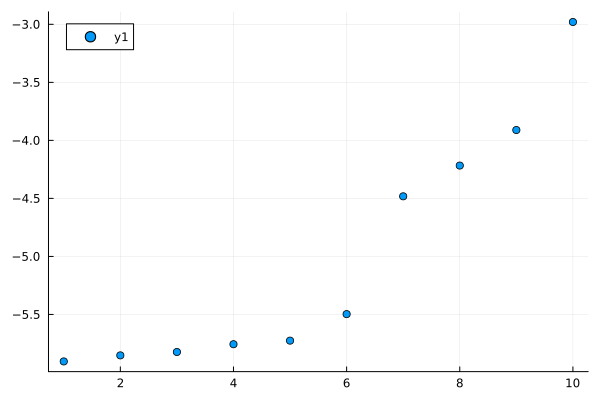

In [64]:
ϵ_proj_hard_core, psi = eigenstates(Total_H);
scatter(ϵ_proj_hard_core)

#### Hard-Core: Off

In [7]:
HardCore = false
HHubbard, P, Pt, basis_cut_mb, _ = H_Hubbard_Projection(N, pn, U, matrix, Cut_Off, HardCore)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
basis_cut_sp = NLevelBasis(Cut_Off)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [8]:
Impurity_H = Imp_H(Sub_Number_MB_Operator_List, Impurity_Data, Vrand);

In [9]:
Total_H = HHubbard + Impurity_H;

In [10]:
ϵ_proj_finite, λ_proj_finite = eigenstates(dense(Total_H));

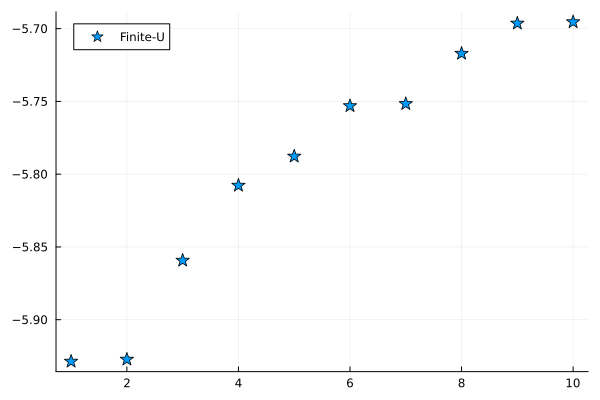

In [11]:
n = 1 
m = 10

#scatter(ϵ_proj_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")
scatter!(ϵ_proj_finite[n:m], markershape=:star,markersize=7, label="Finite-U")

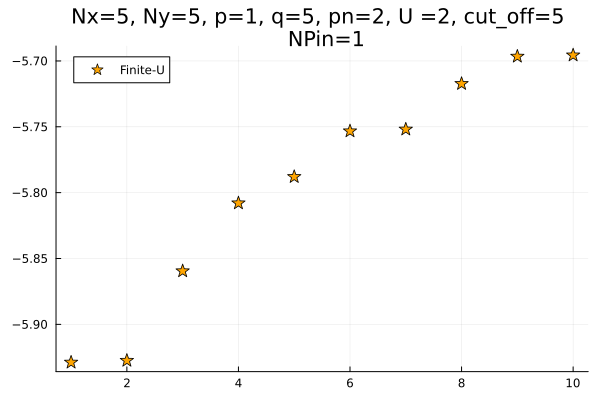

In [31]:
n = 1
m = 10
scatter(ϵ_proj_finite[n:m], markershape=:star,markersize=7, color=:orange, label="Finite-U",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off) \n NPin=$(NPin)")

# WITHOUT PROJECTION

#### Hard-Core: On

In [12]:
HardCore = true
HHubbard, basis_mb = H_Hubbard(N, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

LoadError: MethodError: no method matching H_Hubbard(::Int64, ::Int64, ::Matrix{ComplexF64}, ::Bool)

[0mClosest candidates are:
[0m  H_Hubbard(::Any, ::Any, ::Any, ::Any, [91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m~/Documents/Kagome-Lattice/Hofstadter-KM-Kagome/Many-Body/Scripts/[39m[90m[4mManyBody.jl:101[24m[39m


In [141]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [142]:
Total_H = HHubbard + Impurity_H;

In [143]:
ϵ_hard_core, psi = eigenstates(dense(Total_H));

#### Hard-Core: Off

In [14]:
HardCore = false
HHubbard, basis_mb = H_Hubbard(N, U, pn, matrix, HardCore)

num_list = get_num_list(N)
basis_sp = NLevelBasis(N)
Number_MB_Operator_List = get_num_mb_op(N, basis_sp, num_list, basis_mb);

In [15]:
Impurity_H = Imp_H(Number_MB_Operator_List, Impurity_Data, Vrand);

In [16]:
Total_H = HHubbard + Impurity_H;

In [17]:
ϵ_finite_u, psi = eigenstates(dense(Total_H));

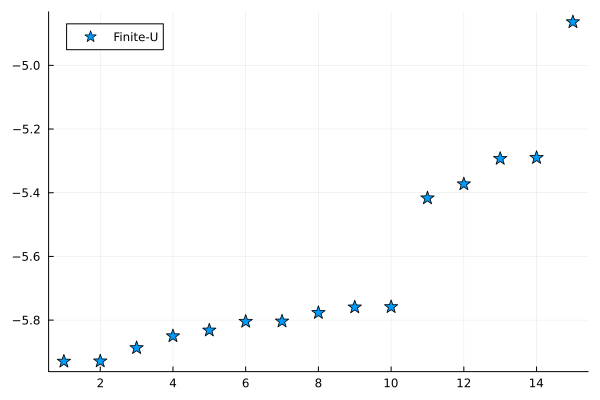

In [19]:
n = 1 
m = 15

#scatter(ϵ_hard_core[n:m],label="Hard-Core",title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n NPin=$(NPin)")
scatter(ϵ_finite_u[n:m], markershape=:star,markersize=7, label="Finite-U")

# CHECK WHETHER IF PROJECTION CODE WORKING CORRECTLY !

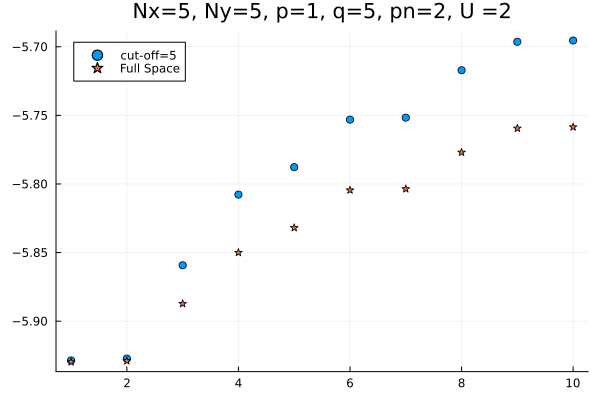

In [22]:
n=1
m=10
scatter(ϵ_proj_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(ϵ_finite_u[n:m], label="Full Space",marker=:star)